# Fishers test for IDH1 and TP53 mutation pathways

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import cptac
import cptac.utils as u

In [2]:
gb = cptac.Gbm()

In [4]:
#get mutations and drop normal samples
mutations = gb.join_omics_to_mutations(
    omics_genes=['IDH1'], omics_df_name='proteomics', mutations_genes=['IDH1','TP53'])
mutations = mutations.loc[mutations['IDH1_Mutation_Status'] != 'Wildtype_Normal']
mutations = mutations.loc[mutations['TP53_Mutation_Status'] != 'Wildtype_Normal']

In [6]:
#Classify all mutations as 'mutation' and all wildtypes as 'wildtype'
mutations = mutations.replace(
    {'Wildtype_Tumor':'Wildtype','Single_mutation':'Mutation','Multiple_mutation':'Mutation'})
mutations

Name,IDH1_proteomics,IDH1_Mutation,IDH1_Location,IDH1_Mutation_Status,TP53_Mutation,TP53_Location,TP53_Mutation_Status,Sample_Status
Sample_ID,,,,,,,,
S001,-0.741522,[Wildtype_Tumor],[No_mutation],Wildtype,[Missense_Mutation],[p.G266R],Mutation,Tumor
S002,-0.460861,[Wildtype_Tumor],[No_mutation],Wildtype,[Missense_Mutation],[p.K132R],Mutation,Tumor
S003,0.271150,[Wildtype_Tumor],[No_mutation],Wildtype,[Wildtype_Tumor],[No_mutation],Wildtype,Tumor
S004,-0.167075,[Wildtype_Tumor],[No_mutation],Wildtype,"[Missense_Mutation, Missense_Mutation]","[p.R248Q, p.R158H]",Mutation,Tumor
S005,-0.234281,[Wildtype_Tumor],[No_mutation],Wildtype,[Wildtype_Tumor],[No_mutation],Wildtype,Tumor
...,...,...,...,...,...,...,...,...
S100,0.312952,[Wildtype_Tumor],[No_mutation],Wildtype,[Wildtype_Tumor],[No_mutation],Wildtype,Tumor
S101,0.933610,[Wildtype_Tumor],[No_mutation],Wildtype,[Wildtype_Tumor],[No_mutation],Wildtype,Tumor
S102,0.300247,[Wildtype_Tumor],[No_mutation],Wildtype,[Wildtype_Tumor],[No_mutation],Wildtype,Tumor


In [10]:
for ind, row in mutations.iterrows():
    if row['IDH1_Mutation_Status'] == 'Mutation' and row['TP53_Mutation_Status'] == 'Mutation':
        mutations.loc[ind, 'Mutation_Exclusivity'] = 'Both'
        
    elif row['IDH1_Mutation_Status'] == 'Mutation' and row['TP53_Mutation_Status'] != 'Mutation':
        mutations.loc[ind, 'Mutation_Exclusivity'] = 'IDH1_Only'
        
    elif row['IDH1_Mutation_Status'] != 'Mutation' and row['TP53_Mutation_Status'] == 'Mutation':
        mutations.loc[ind, 'Mutation_Exclusivity'] = 'TP53_Only'
        
    else:
        mutations.loc[ind, 'Mutation_Exclusivity'] = 'Neither'


In [12]:
#len(RB1_and_other_Mutations.loc[RB1_and_other_Mutations['IDH1_Mutation_Status'] != 'Mutation'])
mutations['Mutation_Exclusivity'].value_counts()

Neither      65
TP53_Only    26
Both          6
IDH1_Only     2
Name: Mutation_Exclusivity, dtype: int64

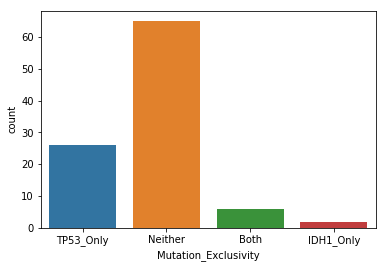

In [13]:
sns.countplot(data=mutations, x='Mutation_Exclusivity')


In [16]:
IDH1_only = mutations.loc[mutations['Mutation_Exclusivity'] == 'IDH1_Only']
other_only = mutations.loc[mutations['Mutation_Exclusivity'] == 'TP53_Only']
Neither = mutations.loc[mutations['Mutation_Exclusivity'] == 'Neither']
Both = mutations.loc[mutations['Mutation_Exclusivity'] == 'Both']
print("RB1 Only: ", len(IDH1_only))
print("TP53 Only: ", len(other_only))
print("Neither: ", len(Neither))
print("Both: ", len(Both))
oddsratio, pval = scipy.stats.fisher_exact([[len(Both), len(other_only)],[len(IDH1_only), len(Neither)]], alternative='less')
print("pval: ",pval)

RB1 Only:  2
TP53 Only:  26
Neither:  65
Both:  6
pval:  0.9986213232328388


Null H: no association for IDH1 and TP53 mutation pathways
        

Alternate hypothesis: IDH1 and TP53 muation pathways are associated

Because the p-value is not significant, we don't reject the null hypothesis (that there is no association with IDH1 and TP53 mutation pathways).

A significant p-value means that there is an association.
"The sum of P-values less than or equal to P_(cutoff)=0.0238 is then 0.0476 which, because it is less than 0.05, is significant. Therefore, in this case, there would be a statistically significant association between the journal and type of article appearing"
http://mathworld.wolfram.com/FishersExactTest.html

This value can be interpreted as the sum of evidence provided by the observed data—or any more extreme table—for the null hypothesis (that there is no difference in the proportions of studiers between men and women). The smaller the value of p, the greater the evidence for rejecting the null hypothesis; so here the evidence is strong that men and women are not equally likely to be studiers. 
https://en.wikipedia.org/wiki/Fisher%27s_exact_test

In [ ]:
# Check counts

In [29]:
# Check RB1_only
RB1_mutations = gb.join_omics_to_mutations(omics_genes=['RB1'], omics_df_name='proteomics', mutations_genes=['RB1'])
RB1_mutations = RB1_mutations.loc[RB1_mutations['RB1_Mutation_Status'] != 'Wildtype_Normal']

In [36]:
RB1_mutations.to_excel('check_rb1.xlsx', sheet_name='Sheet1')

In [37]:
# check TP53_only
TP53_mutations = gb.join_omics_to_mutations(omics_genes=['TP53'], omics_df_name='proteomics', mutations_genes=['TP53'])
TP53_mutations = TP53_mutations.loc[TP53_mutations['TP53_Mutation_Status'] != 'Wildtype_Normal']

In [38]:
TP53_mutations.to_excel('check_tp53.xlsx', sheet_name='Sheet1')

In [41]:
# check Both and Neither
mutations = gb.join_omics_to_mutations(omics_genes=['RB1','TP53'], omics_df_name='proteomics', mutations_genes=['TP53','RB1'])
mutations = mutations.loc[mutations['RB1_Mutation_Status'] != 'Wildtype_Normal']
both_mutations = mutations.loc[mutations['TP53_Mutation_Status'] != 'Wildtype_Normal']

In [43]:
both_mutations.to_excel('check_both.xlsx', sheet_name='Sheet1')

In [68]:
m = u.get_frequently_mutated(gb,.01)
m.loc[m['Gene']== 'PDGFRA']

Name,Gene,Unique_Samples_Mut,Missense_Mut,Truncation_Mut,Non-Coding
2192,PDGFRA,0.030303,0.030303,0.0,0.0


In [52]:
m = u.get_frequently_mutated(gb,.05)

In [54]:
m

Name,Gene,Unique_Samples_Mut,Missense_Mut,Truncation_Mut,Non-Coding
0,ARHGAP5,0.060606,0.050505,0.030303,0.000000
1,ATP10A,0.050505,0.050505,0.000000,0.000000
2,ATP4A,0.050505,0.050505,0.000000,0.000000
3,ATRX,0.090909,0.020202,0.070707,0.000000
4,BRAF,0.060606,0.060606,0.000000,0.000000
5,CSMD3,0.050505,0.050505,0.000000,0.000000
6,DOCK6,0.060606,0.050505,0.010101,0.000000
7,DSG4,0.050505,0.050505,0.000000,0.000000
8,EGFR,0.161616,0.161616,0.000000,0.000000
9,EPHA6,0.050505,0.030303,0.000000,0.020202
